In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import os

In [22]:
crime_df = pd.read_csv("../References/crime.csv")
print(crime_df.columns)
crime_df.head()
is_crime_df = crime_df.loc[crime_df['IS_CRIME']==1]
print(len(crime_df))
print(len(is_crime_df))
is_crime_df


534103
Index(['INCIDENT_ID', 'OFFENSE_ID', 'OFFENSE_CODE', 'OFFENSE_CODE_EXTENSION',
       'OFFENSE_TYPE_ID', 'OFFENSE_CATEGORY_ID', 'FIRST_OCCURRENCE_DATE',
       'LAST_OCCURRENCE_DATE', 'REPORTED_DATE', 'INCIDENT_ADDRESS', 'GEO_X',
       'GEO_Y', 'GEO_LON', 'GEO_LAT', 'DISTRICT_ID', 'PRECINCT_ID',
       'NEIGHBORHOOD_ID', 'IS_CRIME', 'IS_TRAFFIC'],
      dtype='object')
534103
401178


,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,2.018870e+09,2.018870e+15,2399,0,theft-other,larceny,12/27/2018 15:58,NaN,12/27/2018 16:51,2681 N HANOVER CT,3178210.0,1700715.0,-104.866156,39.755561,5,512,stapleton,1,0
2,2.017601e+10,2.017600e+16,2399,1,theft-bicycle,larceny,6/8/2017 13:15,6/8/2017 17:15,6/12/2017 8:44,1705 17TH ST,3140790.0,1699792.0,-104.999264,39.753669,6,612,union-station,1,0
3,2.019601e+10,2.019600e+16,2308,0,theft-from-bldg,larceny,12/7/2019 13:07,12/7/2019 18:30,12/9/2019 13:35,1350 N IRVING ST,3132400.0,1694088.0,-105.029208,39.738134,1,122,west-colfax,1,0
4,2.018862e+09,2.018860e+15,5016,0,violation-of-restraining-order,all-other-crimes,12/22/2018 20:15,12/22/2018 20:31,12/22/2018 22:00,13625 E RANDOLPH PL,3188580.0,1716158.0,-104.828868,39.797750,5,521,montbello,1,0
5,2.018264e+09,2.018260e+15,1316,0,threats-to-injure,public-disorder,3/29/2018 10:00,4/17/2018 10:00,4/20/2018 13:33,1865 LARIMER ST,3142086.0,1699093.0,-104.994668,39.751731,6,612,union-station,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534098,2.020586e+09,2.020590e+15,1313,0,assault-simple,other-crimes-against-persons,9/30/2020 10:00,NaN,9/30/2020 11:26,8801 E MLK BLVD,3172894.0,1702787.0,-104.885013,39.761350,5,512,central-park,1,0
534099,2.020550e+09,2.020550e+15,1315,1,aggravated-assault-dv,aggravated-assault,9/12/2020 7:34,NaN,9/12/2020 7:34,5375 W 10TH AVE,3125094.0,1692507.0,-105.055214,39.733895,1,122,villa-park,1,0
534100,2.020601e+10,2.020600e+16,2304,0,theft-parts-from-vehicle,theft-from-motor-vehicle,9/12/2020 14:45,9/12/2020 14:45,9/12/2020 14:57,902 27TH ST,3145983.0,1700959.0,-104.980771,39.756793,2,211,five-points,1,0
534101,2.020582e+09,2.020580e+15,5707,0,criminal-trespassing,all-other-crimes,9/28/2020 17:59,NaN,9/28/2020 17:59,1201 5TH ST,3137809.0,1695270.0,-105.009952,39.741300,1,123,auraria,1,0


In [27]:
print(is_crime_df['REPORTED_DATE'].max())
print(is_crime_df['REPORTED_DATE'].min())

9/9/2020 9:57
1/1/2016 0:17


In [28]:
crime_by_offense_type = is_crime_df.groupby(['OFFENSE_TYPE_ID'])
offense_type_count = crime_by_offense_type['OFFENSE_TYPE_ID'].count()
len(offense_type_count)

197

In [29]:
offense_category_count = crime_by_offense_category['OFFENSE_CATEGORY_ID'].count()
offense_category = crime_by_offense_category['OFFENSE_CATEGORY_ID']
len(offense_category)

15

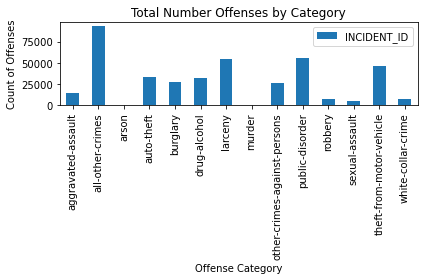

In [31]:
crime_by_offense_category_df = is_crime_df.groupby('OFFENSE_CATEGORY_ID').count().reset_index()

#crime_by_offense_category_df = crime_by_offense_category_df.rename(columns={'OFFENSE_CATEGORY_ID':'Count of Offenses'})
crime_by_offense_category_df

crime_by_offense_category_df.plot(kind='bar',x= 'OFFENSE_CATEGORY_ID',y= 'INCIDENT_ID').legend(loc='upper right')
plt.title("Total Number Offenses by Category")
plt.xlabel("Offense Category")
plt.ylabel('Count of Offenses')
plt.tight_layout()